In [1]:
 # For data manipulation and analysis
import pandas as pd
import numpy as np
# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#library for natural language processing tasks
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
## For converting text data into TF-IDF (Term Frequency-Inverse Document Frequency) vectors
from sklearn.feature_extraction.text import TfidfVectorizer
#For splitting data into training and testing sets
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression
#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
# For generating word clouds to visualize text data.
from wordcloud import WordCloud
# For calculating the frequency distribution of words in text data.
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Womens Clothing Reviews Data.xlsx")

In [3]:
len(df)

23486

In [4]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


### Data Preprocessing

In [5]:
#Checking Missing Values
df.isnull().sum().sum()

4697

In [6]:
#Removing missing values
df.dropna(inplace=True)

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis (EDA)


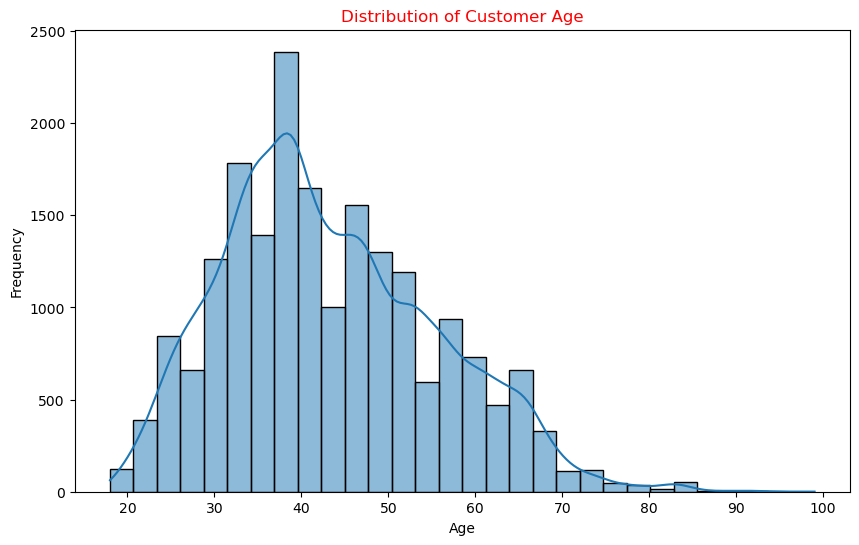

In [8]:
# Analyze distributions of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=30, kde=True)
plt.title("Distribution of Customer Age",c='r')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

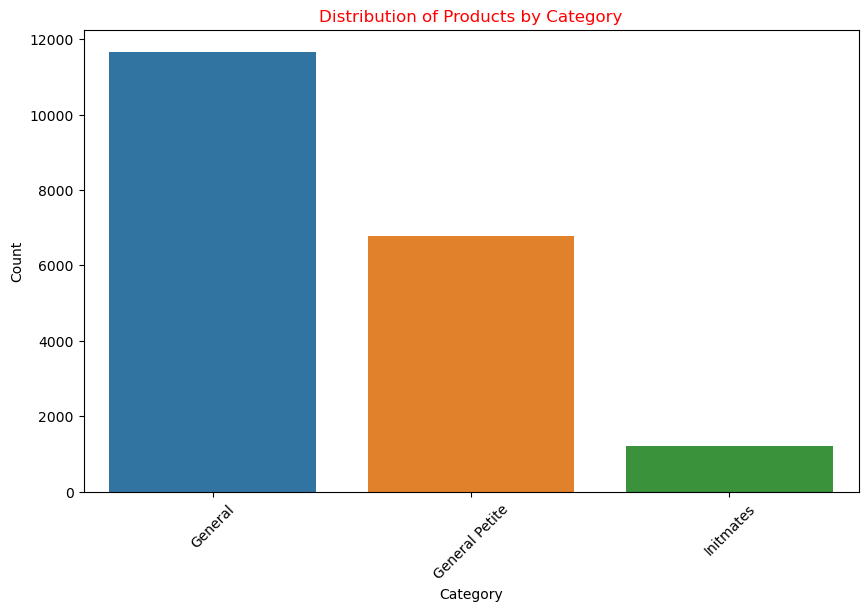

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title("Distribution of Products by Category",c='r')
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Text Mining

In [10]:
# Combined review title and text
df['Combined Review'] = df['Review Title'].fillna('') + ' ' + df['Review Text'].fillna('')

In [11]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())      # Tokenization and convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

In [13]:
df['Cleaned Review'] = df['Combined Review'].apply(preprocess_text)

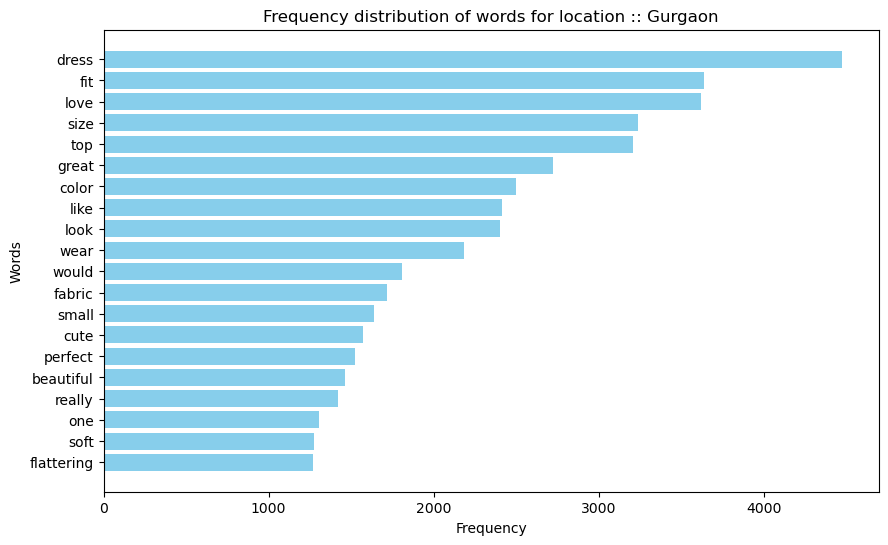

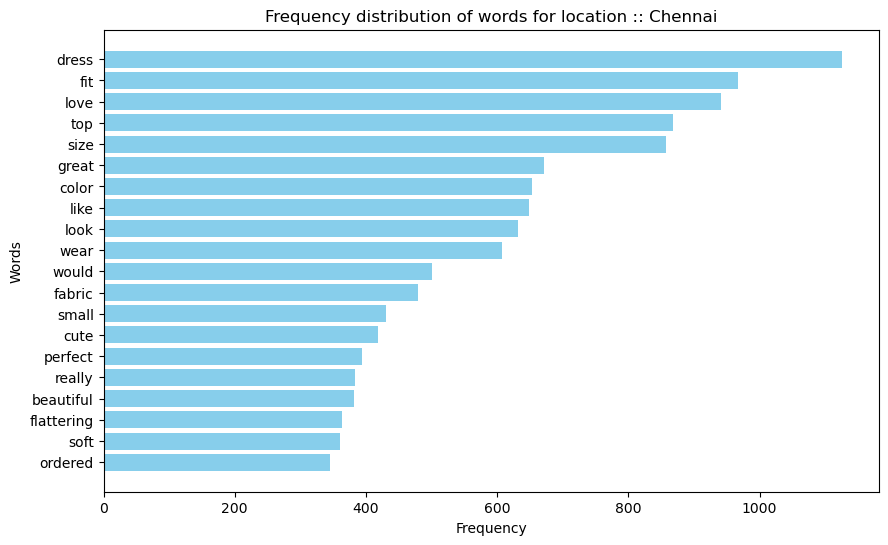

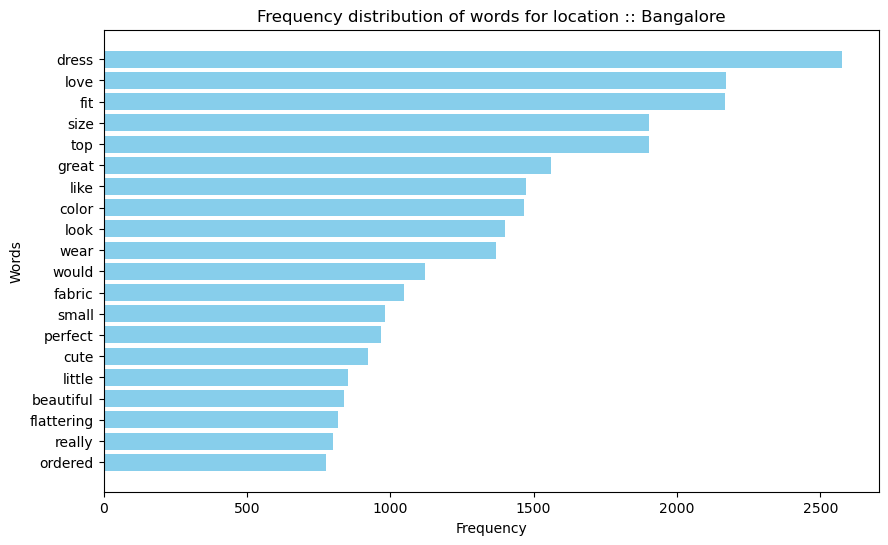

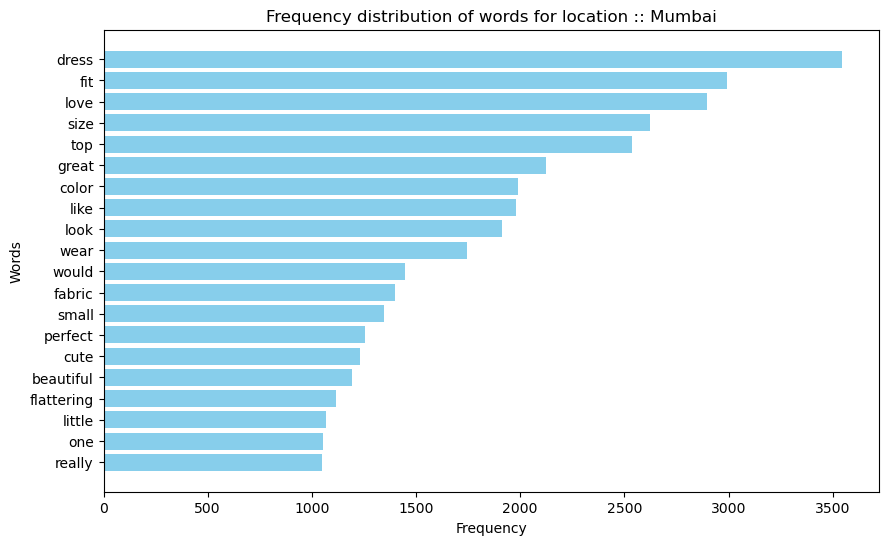

In [115]:
for i in df['Location'].unique():
    ab=df.loc[df['Location']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data]
    frequencies = [item[1] for item in data]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :: {i}")
    plt.gca().invert_yaxis()  
    plt.show()

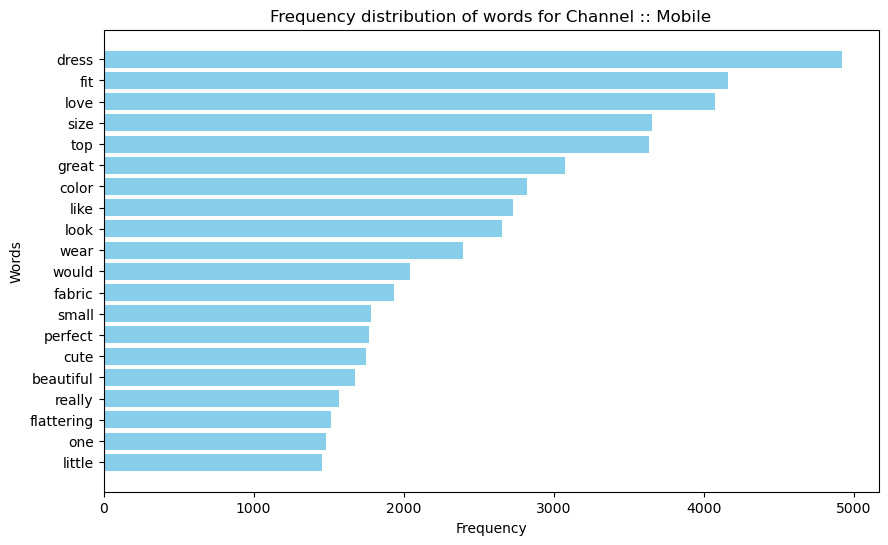

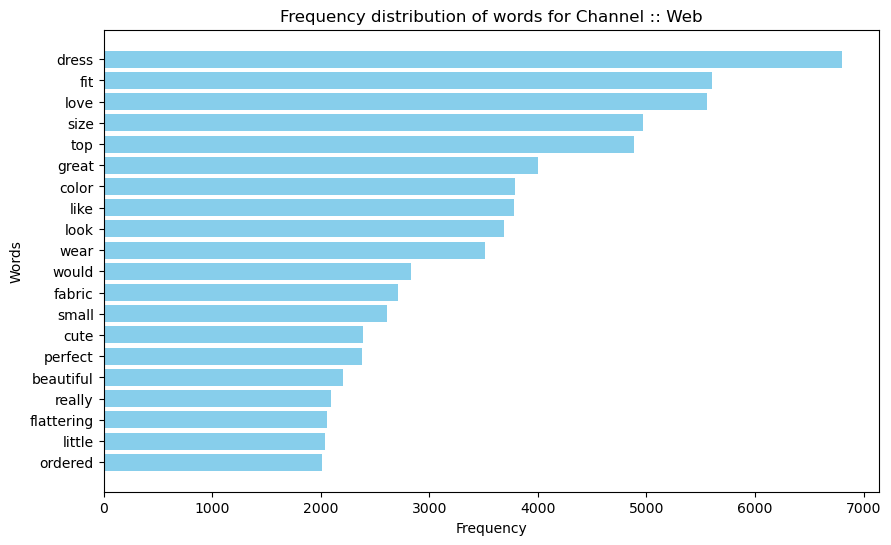

In [116]:
for i in df['Channel'].unique():
    ab=df.loc[df['Channel']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data]
    frequencies = [item[1] for item in data]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for Channel :: {i}")
    plt.gca().invert_yaxis() 
    plt.show()

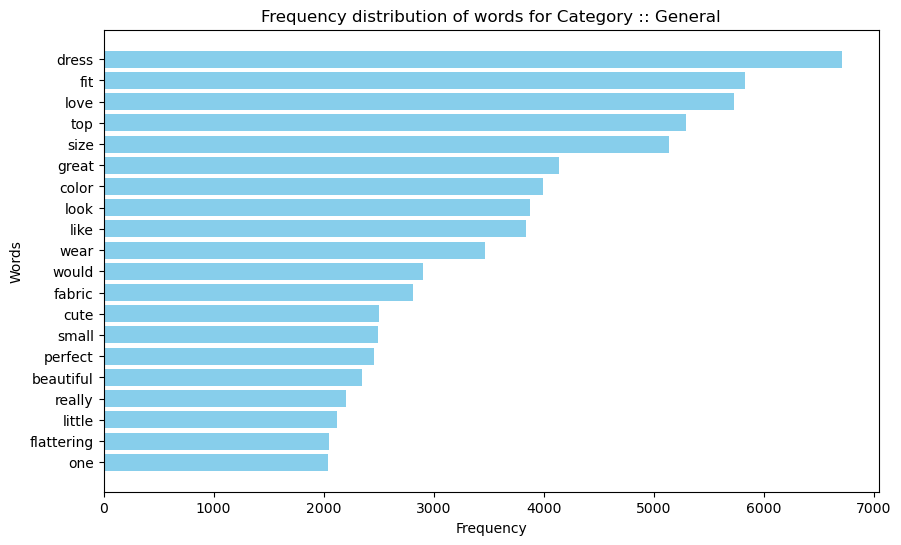

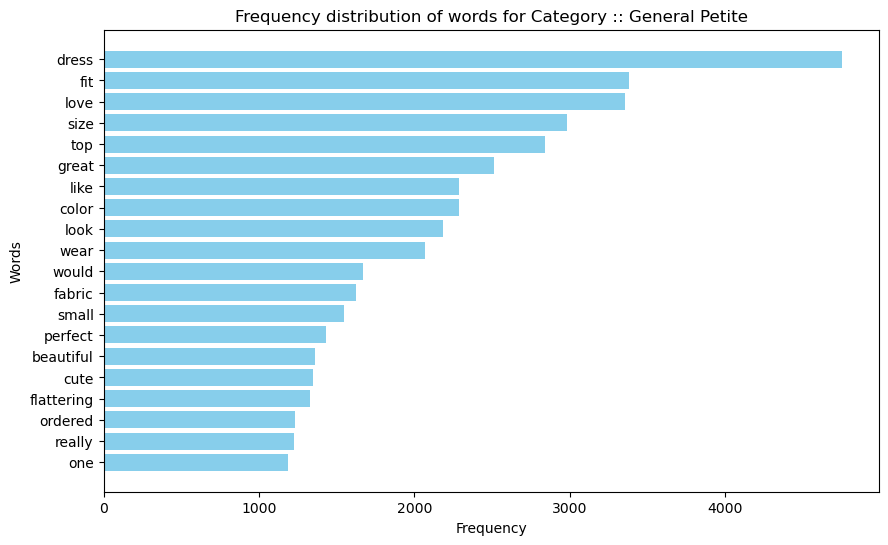

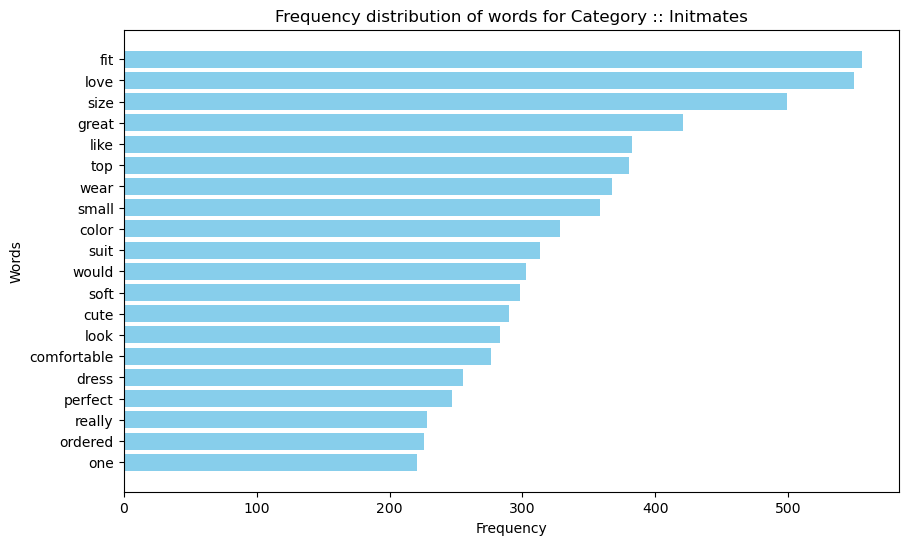

In [117]:
for i in df['Category'].unique():
    ab=df.loc[df['Category']==i]
    text = " ".join(ab["Cleaned Review"].values)
    print("\n")
    freq_distribution = FreqDist(word_tokenize(text))
    data = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data]
    frequencies = [item[1] for item in data]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for Category :: {i}")
    plt.gca().invert_yaxis()  
    plt.show()

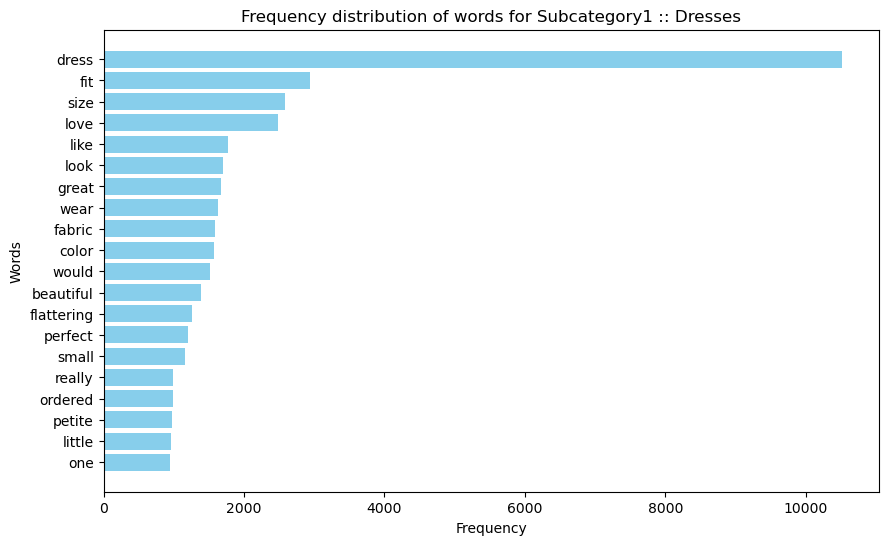

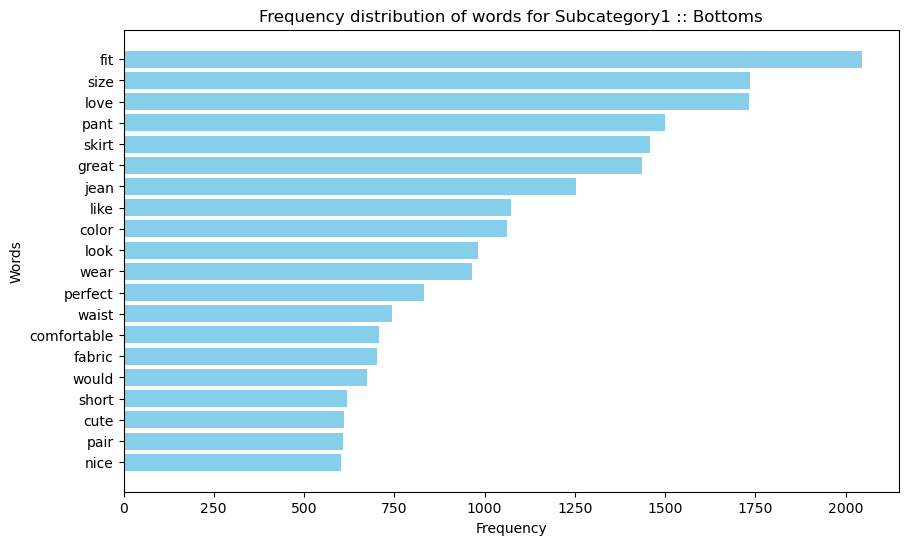

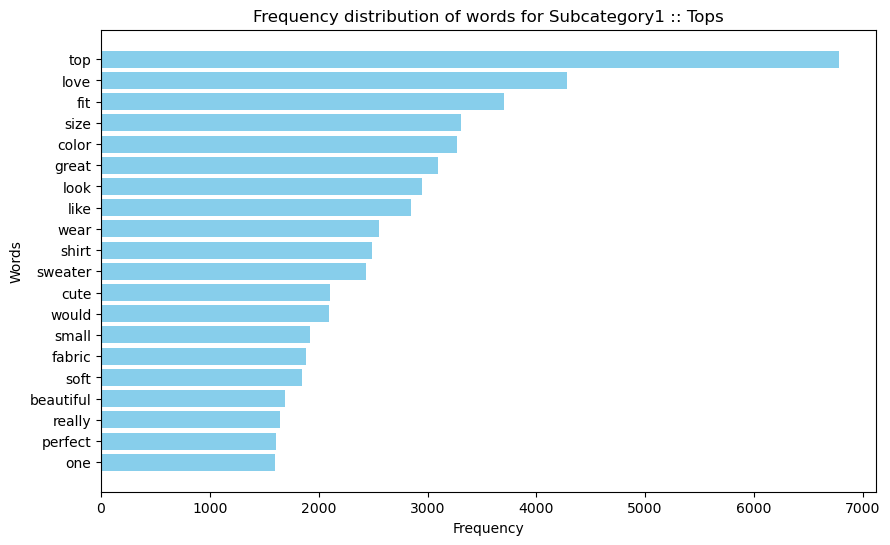

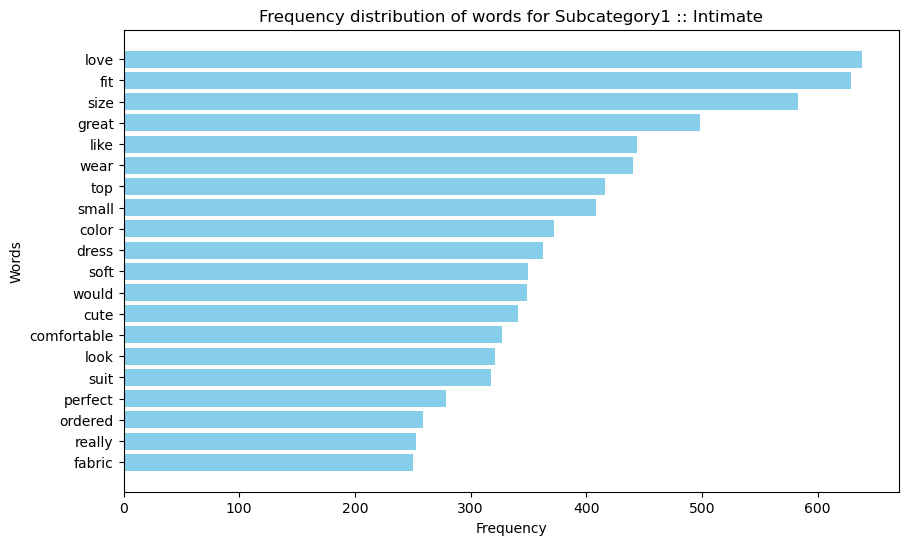

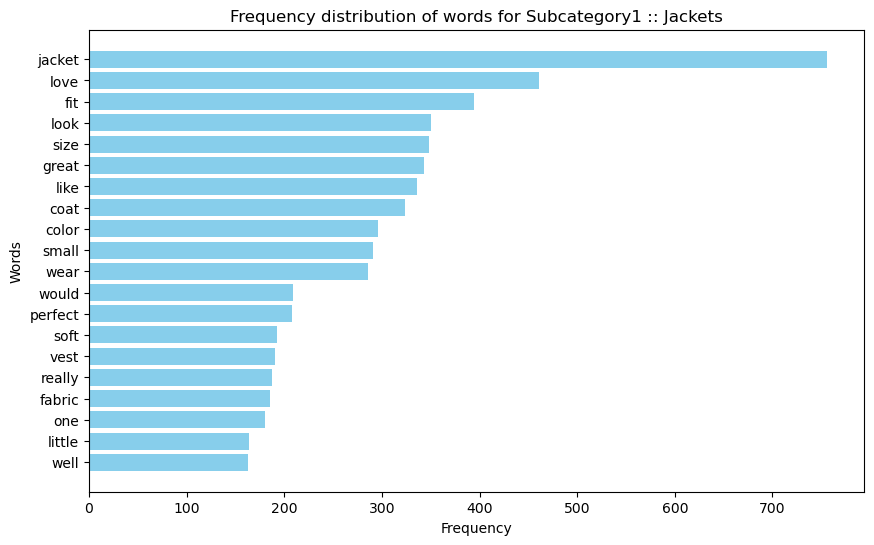

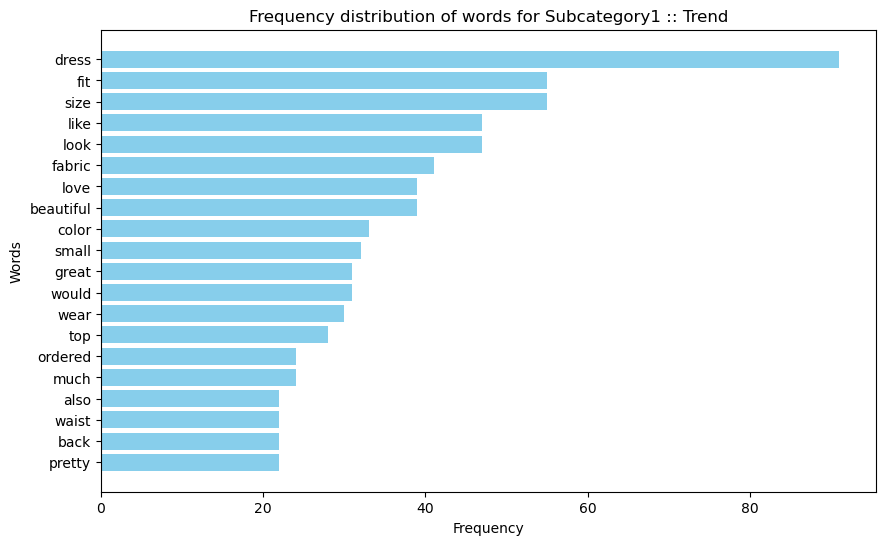

In [118]:
for i in df['Subcategory1'].unique():
    ab=df.loc[df['Subcategory1']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data]
    frequencies = [item[1] for item in data]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for Subcategory1 :: {i}")
    plt.gca().invert_yaxis() 
    plt.show()

### Sentiment Analysis


In [17]:
sid = SentimentIntensityAnalyzer()

In [18]:
def get_sentiment_nltk(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.2:
        return 'Positive'
    elif scores['compound'] <= -0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
df['Sentiment'] = df['Cleaned Review'].apply(get_sentiment_nltk)

In [119]:
# Sentiment analysis by channel
channel_sentiment = df.groupby('Channel')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

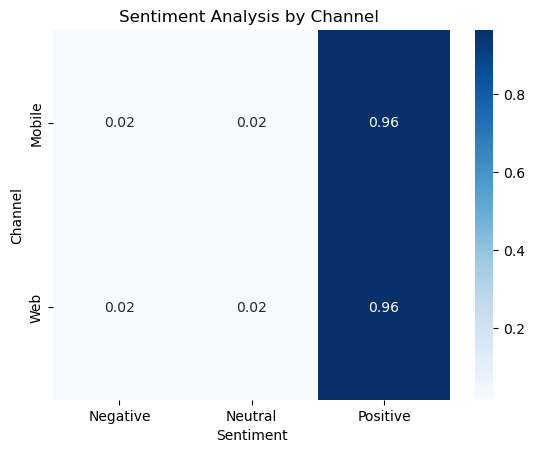

In [120]:
sns.heatmap(channel_sentiment, annot=True, cmap='Blues', fmt=".2f")
plt.title('Sentiment Analysis by Channel ')
plt.show()

#### Overall, the sentiment data suggests that both the Mobile and Web channels predominantly convey positive sentiments, with a small proportion of negative sentiments and neutral sentiments. This could imply that customers generally have a positive perception or experience with the product or service being evaluated across both channels. 

In [121]:
# Sentiment analysis by location
location_sentiment = df.groupby('Location')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

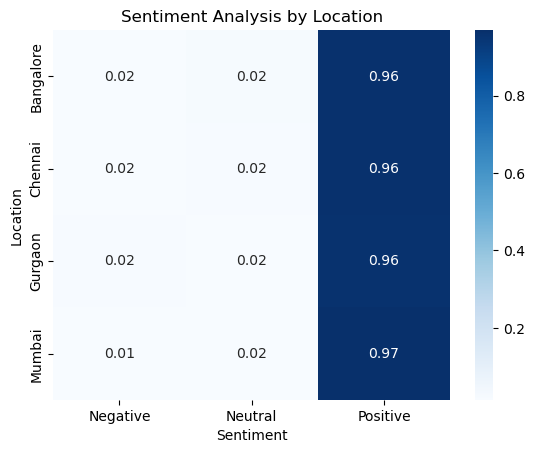

In [122]:
sns.heatmap(location_sentiment, annot=True, cmap='Blues', fmt=".2f")
plt.title('Sentiment Analysis by Location')
plt.show()

#### Overall, the sentiment data suggests that across all locations (Bangalore, Chennai, Gurgaon, and Mumbai), there is a predominant expression of positive sentiments. Negative sentiments are relatively low in all locations, while neutral sentiments fall between positive and negative sentiments. This could imply that the sentiment towards the subject being analyzed (such as a product, service, or experience) is generally positive across these cities. 

In [123]:
# Sentiment analysis by category
category_sentiment = df.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

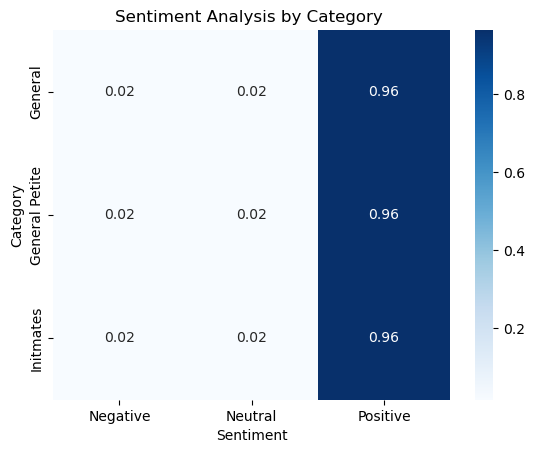

In [124]:
sns.heatmap(category_sentiment, annot=True, cmap='Blues', fmt=".2f")
plt.title('Sentiment Analysis by Category ')
plt.show()

#### the sentiment data suggests that across all categories (General, General Petite, and Intimates), there is a predominant expression of positive sentiments. Negative sentiments are relatively low in all categories, while neutral sentiments fall between positive and negative sentiments. This could imply that the sentiment towards the products or services in these categories is generally positive.

In [125]:
# Sentiment analysis by subcategory1
subcategory1_sentiment = df.groupby('Subcategory1')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

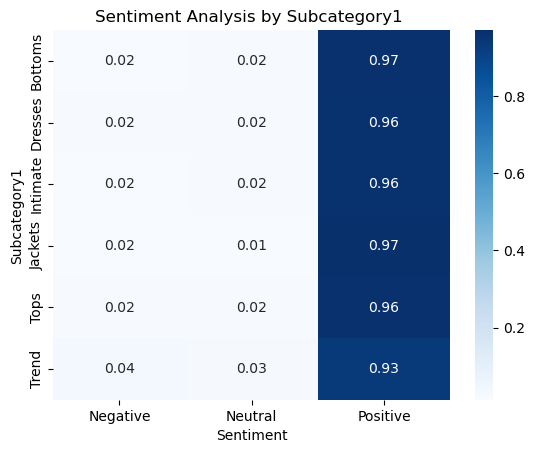

In [126]:
sns.heatmap(subcategory1_sentiment, annot=True, cmap='Blues', fmt=".2f")
plt.title('Sentiment Analysis by Subcategory1 ')
plt.show()

#### the sentiment data suggests that across most subcategories, there is a predominant expression of positive sentiments. Negative sentiments are generally low across all subcategories, with some variations. The "Trend" subcategory stands out with a slightly different sentiment distribution, showing a relatively lower positive sentiment and higher negative and neutral sentiments compared to other subcategories. This could imply differences in customer perceptions or experiences within each subcategory.

In [127]:
# Sentiment analysis by age group
age_group_sentiment = df.groupby(pd.cut(df['Customer Age'], bins=[0, 20, 30, 40, 50, float('inf')]))['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

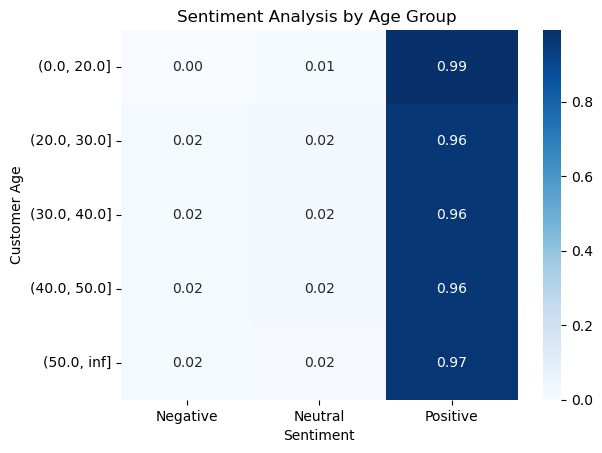

In [128]:
sns.heatmap(age_group_sentiment, annot=True, cmap='Blues', fmt=".2f")
plt.title('Sentiment Analysis by Age Group ')
plt.show()

#### the sentiment data suggests that across different customer age groups, there is a predominant expression of positive sentiments. Negative sentiments are generally low across all age groups, with some variations. The youngest age group (0 to 20 years) stands out with an overwhelmingly positive sentiment, while the older age groups also show a strong positive sentiment but with slightly higher proportions of negative and neutral sentiments compared to the youngest age group.

### Predictive Analytics

#### Predicting which customers are recommending,

In [30]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['Cleaned Review'])
y = df['Recommend Flag']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [34]:
print("Accuracy Train:: ",accuracy_score(pred_train,y_train))
print("Accuracy Test:: ",accuracy_score(pred_test,y_test))

Accuracy Train::  0.9090851293788543
Accuracy Test::  0.9092295957284515


In [36]:
cv=cross_val_score(estimator=lr,X=X,y=y,cv=3)
cv.mean()

0.897009459871834

In [37]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71       700
           1       0.92      0.97      0.95      3233

    accuracy                           0.91      3933
   macro avg       0.87      0.80      0.83      3933
weighted avg       0.90      0.91      0.90      3933



#### From the above evaluation we can conclude that our model is able to predict with 89.7% accuracy.

### Predicting rating based on the review

In [38]:
X = tfidf_vectorizer.fit_transform(df['Cleaned Review'])
y = df['Rating']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [40]:
# Train a RandomForestClassifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [42]:
print("Accuracy Train:: ",accuracy_score(pred_train,y_train))
print("Accuracy Test:: ",accuracy_score(pred_test,y_test))

Accuracy Train::  0.7065293407082459
Accuracy Test::  0.6570048309178744


In [43]:
cv=cross_val_score(estimator=lr,X=X,y=y,cv=3)
cv.mean()

0.6430169870816803

In [44]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.42      0.12      0.19       138
           2       0.39      0.28      0.33       272
           3       0.44      0.40      0.42       493
           4       0.49      0.34      0.40       858
           5       0.76      0.92      0.83      2172

    accuracy                           0.66      3933
   macro avg       0.50      0.41      0.43      3933
weighted avg       0.62      0.66      0.63      3933



#### From the above evaluation we can conclude that our model is able to predict with 64.3% accuracy.

### Dashboard Creation

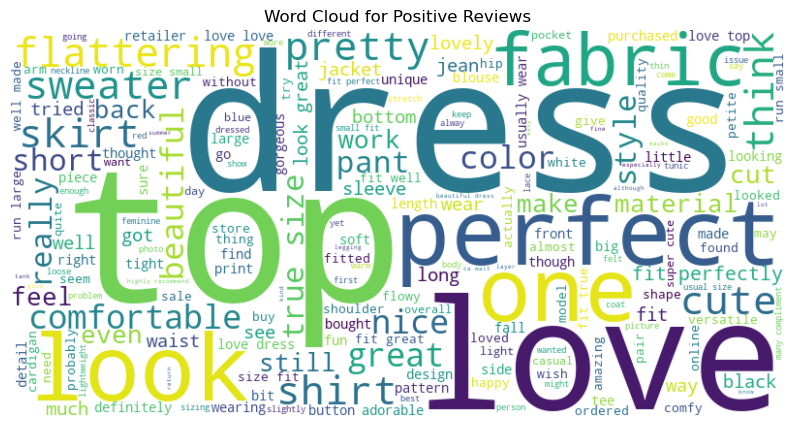

In [45]:
# Word cloud for positive reviews
positive_reviews = df[df['Recommend Flag'] == 1]['Cleaned Review']
positive_text = ' '.join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis('off')
plt.show()

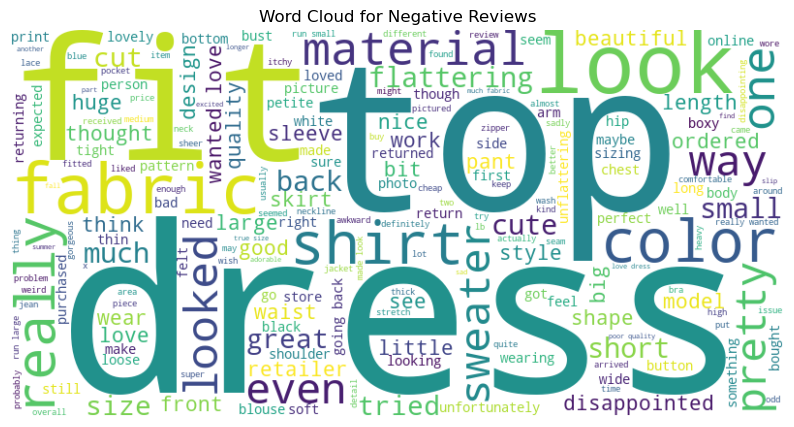

In [46]:
# Word cloud for negative reviews
negative_reviews = df[df['Recommend Flag'] == 0]['Cleaned Review']
negative_text = ' '.join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis('off')
plt.show()
